In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

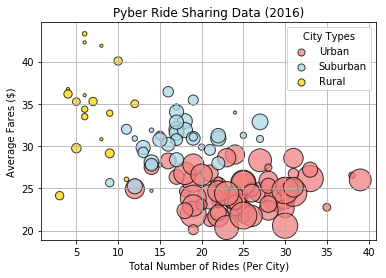

In [19]:
#City Type .loc
urban = merge_table.loc[(merge_table["type"] == "Urban")]
suburban = merge_table.loc[(merge_table["type"] == "Suburban")]
rural = merge_table.loc[(merge_table["type"] == "Rural")]
#Determing Fares
urbanfares = urban.groupby(["city"]).fare.mean()
suburbanfares = suburban.groupby(["city"]).fare.mean()
ruralfares = rural.groupby(["city"]).fare.mean()
#Determining Rides
urbanrides = urban.groupby(["city"]).ride_id.count()
suburbanrides = suburban.groupby(["city"]).ride_id.count()
ruralrides = rural.groupby(["city"]).ride_id.count()
#Determining Drivers
driver_counturban = urban.groupby(["city"]).driver_count.mean()
driver_countsuburban = suburban.groupby(["city"]).driver_count.mean()
driver_countrural = rural.groupby(["city"]).driver_count.mean()
#Scatter Plot
plt.scatter(urbanrides, urbanfares, s=(driver_counturban*10), marker="o", facecolor="lightcoral", edgecolor="black", alpha=0.75, label="Urban")
plt.scatter(suburbanrides, suburbanfares, s=(driver_countsuburban*10), marker="o", facecolor="lightblue", edgecolor="black", alpha=0.75, label="Suburban")
plt.scatter(ruralrides, ruralfares, s=(driver_countrural*10), marker="o", facecolor="gold", edgecolor="black", alpha=0.75, label="Rural")
legend = plt.legend(title="City Types", loc="best")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.grid(True)
plt.show()

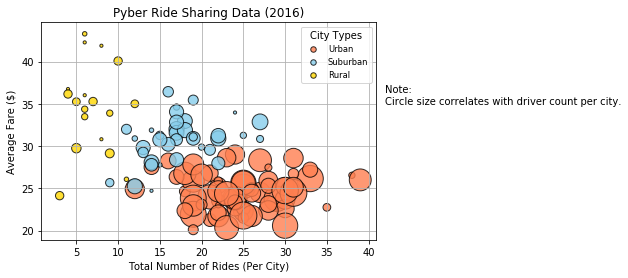

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

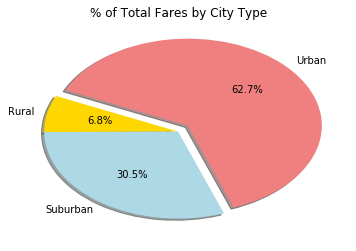

In [14]:
# Calculate Type Percents
total_urb = (merge_table.loc[merge_table['type'] == "Urban", "fare"]).sum()
total_sub = (merge_table.loc[merge_table['type'] == "Suburban", "fare"]).sum()
total_rur = (merge_table.loc[merge_table['type'] == "Rural", "fare"]).sum()
total_fares = total_urb + total_sub + total_rur
urban_per = (total_urb / total_fares) * 100
suburban_per = (total_sub / total_fares) * 100
rural_per = (total_rur / total_fares) * 100
percents = [urban_per, rural_per, suburban_per]
labels = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightblue"]
explode = (0.1,0,0)
# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=290)

# Save Figure
plt.savefig("../Images/PyPies_Fares.png")
plt.show()

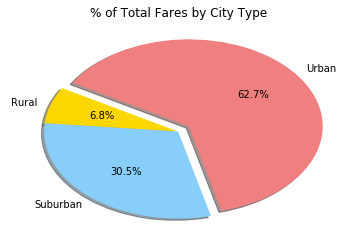

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

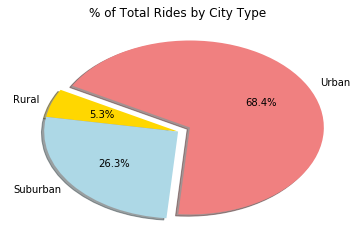

In [15]:
# Calculate Ride Percents
total_rides = len(merge_table)
urban_rides = (merge_table.loc[merge_table['type'] == "Urban", "ride_id"]).count()
suburban_rides = (merge_table.loc[merge_table['type'] == "Suburban", "ride_id"]).count()
rural_rides = (merge_table.loc[merge_table['type'] == "Rural", "ride_id"]).count()
urban_ride_per = (urban_rides / total_rides) * 100
suburban_rides_per = (suburban_rides / total_rides) * 100
rural_rides_per = (rural_rides / total_rides) * 100
percents = [urban_ride_per, rural_rides_per, suburban_rides_per]
labels = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightblue"]
explode = (0.1,0,0)
# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=265)

# Save Figure
plt.savefig("../Images/PyPies_Rides.png")
plt.show()

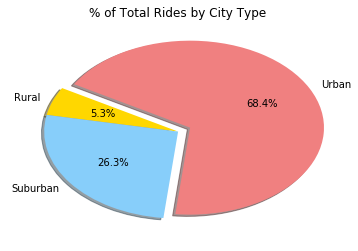

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

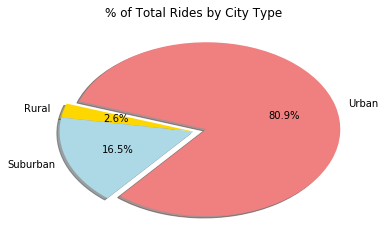

In [16]:
# Calculate Driver Percents
total_urb_dri = (city_data.loc[city_data['type'] == "Urban", "driver_count"]).sum()
total_sub_dri = (city_data.loc[city_data['type'] == "Suburban", "driver_count"]).sum()
total_rur_dri = (city_data.loc[city_data['type'] == "Rural", "driver_count"]).sum()
total_drivers = total_urb_dri + total_sub_dri + total_rur_dri
urban_dri_per = (total_urb_dri / total_drivers) * 100
suburban_dri_per = (total_sub_dri / total_drivers) * 100
rural_dri_per = (total_rur_dri / total_drivers) * 100
dri_percents = [urban_dri_per, rural_dri_per, suburban_dri_per]
labels = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightblue"]
explode = (0.1,0,0)
# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(dri_percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=230)
# Save Figure
plt.savefig("../Images/PyPies_Drivers.png")
plt.show()

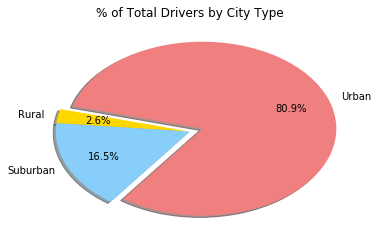

In [6]:
# Show Figure
plt.show()